In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
import petsc4py
from petsc4py import PETSc

Nx=513
Ny=513

R_grid=np.loadtxt('R.dat')
Z_grid=np.loadtxt('Z.dat')
R0 = 0.5*(R_grid[0]+R_grid[512])
X_grid = R_grid-R0
Y_grid = Z_grid
X, Y = np.meshgrid(X_grid, Y_grid) # index of i,j is reversed
Lx=X_grid[-1]-X_grid[0]
Ly=Y_grid[-1]-Y_grid[0]

# Grid spacing
dx = Lx / (Nx-1)
dy = Ly / (Ny-1)

# phi
a = 0.5
phi = np.zeros((Nx,Ny))
for i in range(Nx):
    for j in range(Ny):
        r = np.sqrt(X[j,i]**2+Y[j,i]**2)
        if r<=a:
            phi[i,j] = math.cos(math.pi*r/a)+1 
        
# epsilon
epsilon = np.zeros((Nx,Ny))
for i in range(Nx):
    for j in range(Ny):
        epsilon[i,j] = ((R0+X[j,i])/R0)**2

# rho
rho = np.zeros((Nx,Ny))
for i in range(Nx):
    for j in range(Ny):
        r = np.sqrt(X[j,i]**2+Y[j,i]**2)
        if r!= 0:
            rho[i,j] = epsilon[i,j]*((math.pi**2/a**2)*math.cos(math.pi*r/a)+math.pi/(a*r)*math.sin(math.pi*r/a))+2*(R0+X[j,i])/R0**2*(math.pi*X[j,i]/(a*r))*math.sin(math.pi*r/a)
        else:
            rho[i,j] = 2*math.pi*2/a**2

# Solve the desired Poisson equation using PETSc for varying epsilon

# Define the Poisson equation parameters
hr = Lx / (Nx - 1)  # Grid spacing in x-direction
hz = Ly / (Ny - 1)  # Grid spacing in y-direction

hr2 = hr * hr
hz2 = hz * hz

# Create a PETSc matrix and vector
A = PETSc.Mat().createAIJ(size=(Nx * Ny, Nx * Ny), comm=PETSc.COMM_WORLD)
A.setFromOptions()
A.setUp()

b = PETSc.Vec().createMPI(size=Nx * Ny, comm=PETSc.COMM_WORLD)
b.setFromOptions()
b.setUp()

# Set up the matrix A and vector b
A.zeroEntries()
b.zeroEntries()

for i in range(Nx):
    for j in range(Ny):
        row = j * Nx + i
        r = np.sqrt(X[j,i]**2+Y[j,i]**2)
        if r>a:   
            A.setValue(row, row, 1.0)
            b.setValue(row,0.0)
        else:
            # Set the diagonal element
            A.setValue(row, row, -2.0*epsilon[i,j] / hr2 - 2.0*epsilon[i,j] / hz2)

            # Set the off-diagonal elements
            if i > 0:
                if i == Nx-1:
                    A.setValue(row, row - 1, epsilon[i,j]/hr2-1.0/(2.0*hr2)*(epsilon[i,j]-epsilon[i-1,j]))
                else:
                    A.setValue(row, row - 1, epsilon[i,j]/hr2-1.0/(4.0*hr2)*(epsilon[i+1,j]-epsilon[i-1,j]))
            if i < Nx - 1:
                if i == 0:
                    A.setValue(row, row + 1, epsilon[i,j]/hr2+1.0/(2.0*hr2)*(epsilon[i+1,j]-epsilon[i,j]))
                else:
                    A.setValue(row, row + 1, epsilon[i,j]/hr2+1.0/(4.0*hr2)*(epsilon[i+1,j]-epsilon[i-1,j]))
            if j > 0:
                if j == Ny-1:
                    A.setValue(row, row - Nx, epsilon[i,j]/hz2-1.0/(2.0*hz2)*(epsilon[i,j]-epsilon[i,j-1]))
                else:
                    A.setValue(row, row - Nx, epsilon[i,j]/hz2-1.0/(4.0*hz2)*(epsilon[i,j+1]-epsilon[i,j-1]))
            if j < Ny - 1:
                if j == 0:
                    A.setValue(row, row + Nx, epsilon[i,j]/hz2+1.0/(2.0*hz2)*(epsilon[i,j+1]-epsilon[i,j]))
                else:
                    A.setValue(row, row + Nx, epsilon[i,j]/hz2+1.0/(4.0*hz2)*(epsilon[i,j+1]-epsilon[i,j-1]))

            # Set the right-hand side vector
            b.setValue(row, -rho[i,j])
                       
# Assemble the matrix and vector
A.assemble()
b.assemble()


# Create a PETSc linear solver
ksp = PETSc.KSP().create()
ksp.setFromOptions()
ksp.setOperators(A)
ksp.setType('gmres')  # Conjugate Gradient method
ksp.setTolerances(rtol=1e-8)

# Solve the linear system
x = PETSc.Vec().createMPI(size=Nx * Ny, comm=PETSc.COMM_WORLD)
x.setFromOptions()
x.setUp()

ksp.solve(b, x)

# Print the solution
solution = x.getArray().reshape((Ny, Nx))

# Plot the solution using matplotlib
plt.figure()
plt.contourf(X, Y, solution, cmap='coolwarm')
plt.colorbar()
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Electric Potential')
plt.show()



ModuleNotFoundError: No module named 'petsc4py'

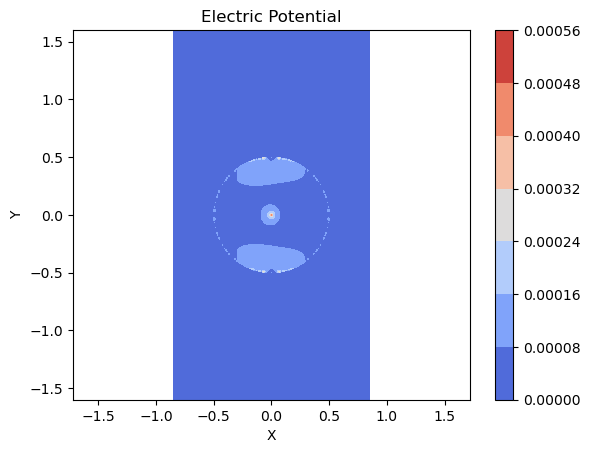

In [2]:
plt.figure()
plt.contourf(X, Y, phi.T-solution, cmap='coolwarm')
plt.colorbar()
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Electric Potential')
plt.show()

In [12]:
outputx_phi3 = []  # To store the numeric values
i=0
with open('ptest', 'r') as file:
    for line in file:
        i+=1
        if i >= 3:
            value = float(line)
            outputx_phi3.append(value)

FileNotFoundError: [Errno 2] No such file or directory: 'ptest'

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sys
#import petsc4py
#from petsc4py import PETSc

Nx=450
Ny=434

R_grid=np.loadtxt('R.dat')
Z_grid=np.loadtxt('Z.dat')
#R0 = 0.5*(R_grid[0]+R_grid[512])
X_grid = R_grid#-R0
Y_grid = Z_grid
X, Y = np.meshgrid(X_grid, Y_grid) # index of i,j is reversed
Lx=X_grid[-1]-X_grid[0]
Ly=Y_grid[-1]-Y_grid[0]

#Nx=length
# Grid spacing
dx = Lx / (Nx-1)
dy = Ly / (Ny-1)

# phi
a = 0.5
phi = np.zeros((Nx,Ny))
for i in range(Nx):
    for j in range(Ny):
        r = np.sqrt(X[j,i]**2+Y[j,i]**2)
        if r<=a:
            phi[i,j] = math.cos(math.pi*r/a)+1 
        
# epsilon
epsilon = np.zeros((Nx,Ny))
for i in range(Nx):
    for j in range(Ny):
        epsilon[i,j] = ((X[j,i]))**2

# rho
rho = np.zeros((Nx,Ny))
for i in range(Nx):
    for j in range(Ny):
        r = np.sqrt(X[j,i]**2+Y[j,i]**2)
        if r!= 0:
            rho[i,j] = 1#epsilon[i,j]*((math.pi**2/a**2)*math.cos(math.pi*r/a)+math.pi/(a*r)*math.sin(math.pi*r/a))+2*(R0+X[j,i])/R0**2*(math.pi*X[j,i]/(a*r))*math.sin(math.pi*r/a)
        else:
            rho[i,j] = 2*math.pi*2/a**2

# Solve the desired Poisson equation using PETSc for varying epsilon

# Define the Poisson equation parameters
hr = Lx / (Nx - 1)  # Grid spacing in x-direction
hz = Ly / (Ny - 1)  # Grid spacing in y-direction

hr2 = hr * hr
hz2 = hz * hz
phi_mat = np.zeros((Nx,Ny))
for idx in range(len(outputx_phi3)):
#    print(idx)
    i = idx%Nx
    j = idx//Nx
    phi_mat[i,j] = outputx_phi3[idx]

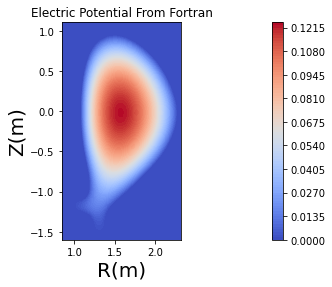

In [7]:
plt.figure()
plt.contourf(X, Y, phi_mat.T,100,cmap='coolwarm')
plt.colorbar()
plt.xlabel('R(m)', fontsize=20)
plt.ylabel('Z(m)',fontsize=20)
plt.axis('scaled')
plt.xlim(min(R_grid), max(R_grid))
plt.ylim(min(Z_grid), max(Z_grid))
plt.title('Electric Potential From Fortran')
plt.show()

In [6]:
min_value = float('inf')
for j in range(Ny):
    for i in range(Nx):
        if phi_mat[i,j]<min_value:
            min_value = phi_mat[i,j]
print(min_value)

-0.000252754


In [7]:
max_value = float('-inf')
for j in range(Ny):
    for i in range(Nx):
        if phi_mat[i,j]>max_value:
            max_value = phi_mat[i,j]
print(max_value)

2.00008


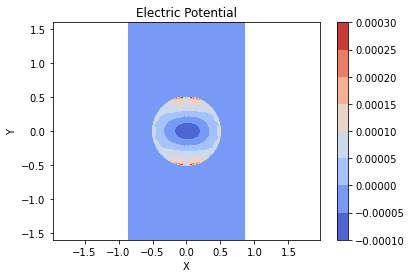

In [8]:
plt.figure()
plt.contourf(X, Y, phi.T-phi_mat.T, cmap='coolwarm')
plt.colorbar()
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Electric Potential')
plt.show()